### 네이버 영화 리뷰 감정 분석
[참고 링크](https://cyc1am3n.github.io/2018/11/10/classifying_korean_movie_review.html)

In [1]:
#-*- coding: utf-8 -*-
def read_data(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        # txt 파일의 헤더(id document label)는 제외하기
        data = data[1:]
    return data

train_data = read_data('/home/ubuntu/movie/NSMC/ratings_train.txt')
test_data = read_data('/home/ubuntu/movie/NSMC/ratings_test.txt')

In [2]:
print(len(train_data))
print(len(train_data[0]))
print(len(test_data))
print(len(test_data[0]))

150000
3
50000
3


In [5]:
from konlpy.tag import Okt

okt = Okt()
print(okt.pos(u'이 밤 그날의 반딧불을 당신의 창 가까이 보낼게요'))

[('이', 'Noun'), ('밤', 'Noun'), ('그날', 'Noun'), ('의', 'Josa'), ('반딧불', 'Noun'), ('을', 'Josa'), ('당신', 'Noun'), ('의', 'Josa'), ('창', 'Noun'), ('가까이', 'Noun'), ('보낼게요', 'Verb')]


In [7]:
import json
import os
from pprint import pprint

def tokenize(doc):
    # norm은 정규화, stem은 근어로 표시하기를 나타냄
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

if os.path.isfile('/home/ubuntu/movie/NSMC/notebook/train_docs.json'):
    with open('/home/ubuntu/movie/NSMC/notebook/train_docs.json', encoding="utf-8") as f:
        train_docs = json.load(f)
    with open('/home/ubuntu/movie/NSMC/notebook/test_docs.json', encoding="utf-8") as f:
        test_docs = json.load(f)
else:
    train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
    test_docs = [(tokenize(row[1]), row[2]) for row in test_data]
    # JSON 파일로 저장
    with open('/home/ubuntu/movie/NSMC/notebook/train_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(train_docs, make_file, ensure_ascii=False, indent="\t")
    with open('/home/ubuntu/movie/NSMC/notebook/test_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(test_docs, make_file, ensure_ascii=False, indent="\t")

# 예쁘게(?) 출력하기 위해서 pprint 라이브러리 사용
pprint(train_docs[0])

[['아/Exclamation',
  '더빙/Noun',
  '../Punctuation',
  '진짜/Noun',
  '짜증나다/Adjective',
  '목소리/Noun'],
 '0']


In [8]:
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

2159921


In [9]:
import nltk
text = nltk.Text(tokens, name='NMSC')

# 전체 토큰의 개수
print(len(text.tokens))

# 중복을 제외한 토큰의 개수
print(len(set(text.tokens)))            

# 출현 빈도가 높은 상위 토큰 10개
pprint(text.vocab().most_common(10))

2159921
49895
[('./Punctuation', 67778),
 ('영화/Noun', 50818),
 ('하다/Verb', 41209),
 ('이/Josa', 38540),
 ('보다/Verb', 38538),
 ('의/Josa', 30188),
 ('../Punctuation', 29055),
 ('가/Josa', 26627),
 ('에/Josa', 26468),
 ('을/Josa', 23118)]


In [10]:
aaa = text.vocab().most_common(100)

import pandas as pd

for i in range(len(aaa)):
    if(bool(aaa[i][0][-4:] == 'Noun')):
        print(aaa[i])
        


('영화/Noun', 50818)
('정말/Noun', 9658)
('것/Noun', 9359)
('진짜/Noun', 8358)
('이/Noun', 8001)
('점/Noun', 7932)
('연기/Noun', 6434)
('평점/Noun', 6324)
('최고/Noun', 6005)
('왜/Noun', 5388)
('스토리/Noun', 5351)
('생각/Noun', 5315)
('드라마/Noun', 5071)
('감동/Noun', 4876)
('사람/Noun', 4836)
('보고/Noun', 4610)
('말/Noun', 4558)
('더/Noun', 4378)
('때/Noun', 4317)
('내/Noun', 4307)
('배우/Noun', 4297)
('거/Noun', 4169)
('감독/Noun', 4126)
('뭐/Noun', 4056)
('재미/Noun', 3910)
('내용/Noun', 3899)
('그냥/Noun', 3841)
('그/Noun', 3694)
('좀/Noun', 3658)
('쓰레기/Noun', 3552)
('시간/Noun', 3446)
('수/Noun', 3253)
('나/Noun', 3051)


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud
import pickle

# f = open('../ratings_train.txt', 'rb')
# d = pickle.load(f, encoding='utf-8')

text2 = open('/home/ubuntu/movie/NSMC/ratings_train.txt',encoding='utf-8').read()
wordcloud = WordCloud(max_words=100,font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate(text2)
wordcloud.words_

{'영화': 1.0,
 '정말': 0.6901306240928883,
 '진짜': 0.6199806482825351,
 '너무': 0.5394291243347847,
 '그냥': 0.3704644412191582,
 'ㅋㅋ': 0.2838655055636188,
 '그리고': 0.21649733913884858,
 '영화는': 0.21504596032897919,
 '이런': 0.21202225447508466,
 '영화가': 0.19339622641509435,
 '내가': 0.1929124334784712,
 '완전': 0.18988872762457668,
 '영화를': 0.1761006289308176,
 '이거': 0.17537493952588293,
 '드라마': 0.1741654571843251,
 '이렇게': 0.1665457184325109,
 '역시': 0.16545718432510886,
 'ㅋㅋㅋ': 0.16461054668601838,
 '이건': 0.16231253023705855,
 'ㅠㅠ': 0.15953072085147557,
 '이게': 0.14211417513304306,
 '최고': 0.14138848572810836,
 '평점': 0.13945331398161587,
 '보고': 0.13376874697629415,
 'ㅡㅡ': 0.13292210933720366,
 '없다': 0.13098693759071117,
 '스토리': 0.12203676826318335,
 'ㅎㅎ': 0.12131107885824867,
 '하지만': 0.1204644412191582,
 '많이': 0.1113933236574746,
 '솔직히': 0.10970004837929366,
 '연기': 0.10933720367682633,
 '별로': 0.102322206095791,
 '그래도': 0.09869375907111756,
 '있는': 0.09772617319787132,
 '보면': 0.09675858732462506,
 '근데': 0.0

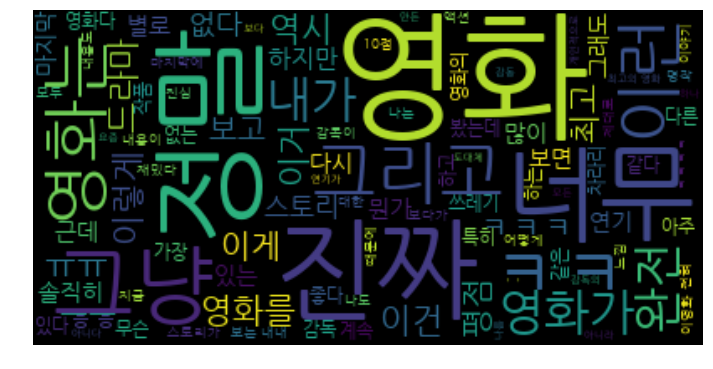

In [15]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
import numpy as np
from PIL import Image
from wordcloud import STOPWORDS



/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


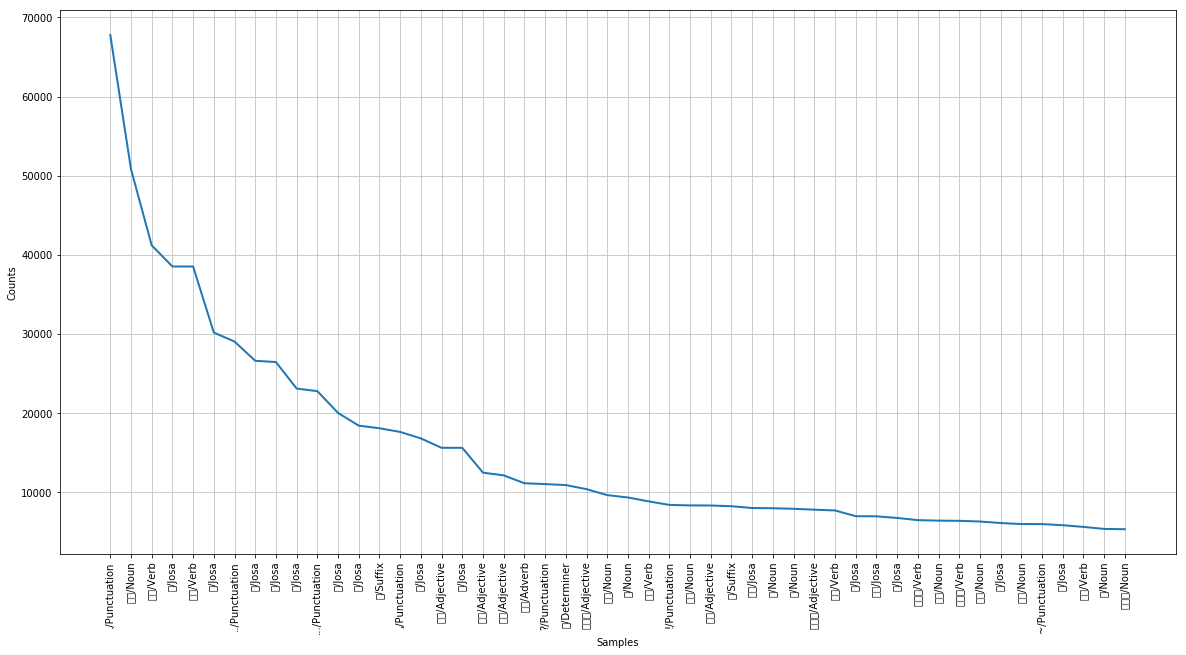

In [19]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_fname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,10))
text.plot(50)

In [20]:
# 시간이 꽤 걸립니다! 시간을 절약하고 싶으면 most_common의 매개변수를 줄여보세요.
import os
from tqdm import tqdm_notebook
import pandas as pd
selected_words = [f[0] for f in tqdm_notebook(text.vocab().most_common(1000))]

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

# if(os.path.isfile('train_x.csv')):
#     train_x=list(pd.read_csv('train_x.csv'))
# else:
#     for d, _ in  tqdm_notebook(train_docs):
#         train_x = term_frequency(d)
#         print(train_x)
        
#         print(df)
#         with open('train_x.csv', 'a') as f:
#             df.to_csv(f,index=False,header=False)
train_x = [term_frequency(d) for d, _ in  tqdm_notebook(train_docs)]
train_y = [c for _, c in  tqdm_notebook(train_docs)]
test_x = [term_frequency(d) for d, _ in  tqdm_notebook(test_docs)]
test_y = [c for _, c in  tqdm_notebook(test_docs)]
# df = pd.DataFrame(train_x)
# df.to_csv('train_x.csv',index=False)
    
# if(os.path.isfile('train_y.csv')):
#     train_y=list(pd.read_csv('train_y.csv'))
# else:
#     train_y = [c for _, c in  tqdm_notebook(train_docs)]
#     df = pd.DataFrame(train_y)
#     df.to_csv('train_y.csv',index=False)
# if(os.path.isfile('test_x.csv')):
#     test_x=list(pd.read_csv('test_x.csv'))
# else:
#     test_x = [term_frequency(d) for d, _ in  tqdm_notebook(test_docs)]
#     df = pd.DataFrame(test_x)
#     df.to_csv('test_x.csv',index=False)
# if(os.path.isfile('test_y.csv')):
#     test_y=list(pd.read_csv('test_y.csv'))
# else:
#     test_y = [c for _, c in  tqdm_notebook(test_docs)]
#     df = pd.DataFrame(test_y)
#     df.to_csv('test_y.csv',index=False)

In [21]:
type(train_x)

list

In [22]:
import numpy as np

x_train = np.asarray(train_x).astype('float32')
x_test = np.asarray(test_x).astype('float32')

y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

In [23]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

model.fit(x_train, y_train, epochs=10, batch_size=512)
results = model.evaluate(x_test, y_test)
# from keras.models import load_model
# model.save('mnist_mlp_model.h5')

Epoch 1/10
150000/150000 [==============================] - 2s 10us/step - loss: 0.4291 - binary_accuracy: 0.8037
Epoch 2/10
150000/150000 [==============================] - 1s 9us/step - loss: 0.3792 - binary_accuracy: 0.8249
Epoch 3/10
150000/150000 [==============================] - 1s 8us/step - loss: 0.3629 - binary_accuracy: 0.8345
Epoch 4/10
150000/150000 [==============================] - 1s 8us/step - loss: 0.3500 - binary_accuracy: 0.8421
Epoch 5/10
150000/150000 [==============================] - 1s 8us/step - loss: 0.3379 - binary_accuracy: 0.8495
Epoch 6/10
150000/150000 [==============================] - 1s 8us/step - loss: 0.3259 - binary_accuracy: 0.8564
Epoch 7/10
150000/150000 [==============================] - 1s 9us/step - loss: 0.3140 - binary_accuracy: 0.8629
Epoch 8/10
150000/150000 [==============================] - 1s 8us/step - loss: 0.3019 - binary_accuracy: 0.8687
Epoch 9/10
150000/150000 [==============================] - 1s 8us/step - loss: 0.2893 - binary

In [24]:
results

[0.40195770259857178, 0.82599999999999996]

keras 학습 모델 저장, 불러오기 필요

In [26]:
from tensorflow.keras.models import load_model
model.save('/home/ubuntu/movie/NSMC/notebook/mnist_mlp_model.h5')

In [27]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [28]:
from tensorflow.keras.models import load_model
model = load_model('/home/ubuntu/movie/NSMC/notebook/mnist_mlp_model.h5')

In [29]:
model

In [30]:
def predict_pos_neg(review):
    token = tokenize(review)
    tf = term_frequency(token)
    data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)
    score = float(model.predict(data))
    if(score > 0.5):
#         print("[{}]는 {:.2f}% 확률로 긍정 리뷰이지 않을까 추측해봅니다.^^\n".format(review, score * 100))
#         print("{:.2f}% -> 긍정\n".format(score*100))
        a = 1
    else:
#         print("[{}]는 {:.2f}% 확률로 부정 리뷰이지 않을까 추측해봅니다.^^;\n".format(review, (1 - score) * 100))
#         print("{:.2f}% -> 부정\n".format((1-score)*100))
        a = 0
    return a

In [31]:
def predict_pos_neg(review):
    token = tokenize(review)
    tf = term_frequency(token)
    data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)
    score = float(model.predict(data))
    if(score > 0.75):
#         print("[{}]는 {:.2f}% 확률로 긍정 리뷰이지 않을까 추측해봅니다.^^\n".format(review, score * 100))
#         print("{:.2f}% -> 긍정\n".format(score*100))
        a = 1
    elif(score <= 0.75 and score > 0.25):
        a=0.5
    else:
#         print("[{}]는 {:.2f}% 확률로 부정 리뷰이지 않을까 추측해봅니다.^^;\n".format(review, (1 - score) * 100))
#         print("{:.2f}% -> 부정\n".format((1-score)*100))
        a = 0
    return a

In [32]:
predict_pos_neg("올해 최고의 영화! 세 번 넘게 봐도 질리지가 않네요.")
predict_pos_neg("배경 음악이 영화의 분위기랑 너무 안 맞았습니다. 몰입에 방해가 됩니다.")
predict_pos_neg("주연 배우가 신인인데 연기를 진짜 잘 하네요. 몰입감 ㅎㄷㄷ")
predict_pos_neg("믿고 보는 감독이지만 이번에는 아니네요")
predict_pos_neg("주연배우 때문에 봤어요")

0.5

In [34]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import sys
import os
import pandas as pd
from tqdm import tqdm_notebook
import multiprocessing

af='after'
be='before'
lis = pd.read_csv('/home/ubuntu/movie/data/naver_movie_all.csv')
j=0
movie_lis2=[]
for i in range(len(lis['naver_movieCd'])):
    if(os.path.isfile('/home/ubuntu/movie/data/after/'+str(lis['naver_movieCd'][i])[:-2]+'.csv') == True):
        movie_lis2.insert(j,str(lis['naver_movieCd'][i])[:-2])
        j+=1
# movie_lis2

In [40]:
import pandas as pd
import numpy as np
import multiprocessing
from tqdm import tqdm
# df = pd.read_csv('root/movie/data2/after/'+code+'.csv')
# df['3']=0

In [43]:
# for code in movie_lis2:
def func123(code):    
    print(code)
    df = pd.read_csv('/home/ubuntu/movie/data/after/'+code+'.csv')
    ll=[]
    for i in range(len(df)):
        pos_neg = predict_pos_neg(df['2'][i])
        ll.append(pos_neg)
        
    df['3']=ll
    df2 = df['0'].drop_duplicates()
    aa_list=[]
    for i in tqdm_notebook(df2):
        aa = np.where(df['0'] == i)
    #     print(aa)
        aa_list.append(aa)
    #     if(start != i):
    #         print(i)
    #         start=i
    #     else:
    #         list1.append()
    bb_list=[]
    cc_list=[]
    dd_list=[]
    for i in tqdm_notebook(range(len(aa_list))):
        tmp=0
        tmp_score=0
        len1 = len(aa_list[i][0])
        for j in range(len(aa_list[i][0])):
            tmp += df['3'][aa_list[i][0][j]]
            tmp_score += df['1'][aa_list[i][0][j]]
        bb_list.append(tmp/len1)
        cc_list.append(tmp_score/len1)
        dd_list.append(len1)
    list2= pd.DataFrame(list(zip(df2,bb_list,cc_list,dd_list)))
    list2.to_csv('/home/ubuntu/movie/data/after_rating/'+code+'_rating.csv',index=False)
    

In [45]:
tmp_list=['85579','146506','146469']
for code in tqdm(tmp_list):
    func123(code)

  0%|          | 0/3 [00:00<?, ?it/s]

85579


 33%|███▎      | 1/3 [04:14<08:28, 254.42s/it]


146506


 67%|██████▋   | 2/3 [08:42<04:21, 261.19s/it]


146469


100%|██████████| 3/3 [12:22<00:00, 247.42s/it]

In [ ]:
# pool = multiprocessing.Pool(processes=4)
# pool.map(func123,movie_lis2)

In [ ]:
# pool.close()
# pool.join()

In [ ]:
ll=[]
for i in tqdm_notebook(range(len(df))):
        pos_neg = predict_pos_neg(df['2'][i])
        ll.append(pos_neg)

In [ ]:
df['3']=ll

In [ ]:
df

In [ ]:
start = df['0'][0]
end = df['0'][len(df['0'])-1]

In [ ]:
df2 = df['0'].drop_duplicates()

In [ ]:
import numpy as np
# np.where(df['0']['20180716']==True)
# for i in tqdm_notebook(0,12):
#     daily=[]
#     date=[]
#     time = df['0'][i]
#     if(start == time):
#         print('1111')
#         daily.insert(start,df['2'][i])
#         print("if")
#     else:
#         date.append(daily)
#         daily.insert(start,df['2'][i])
#         print("else")
#         start -= 1
aa_list=[]
for i in tqdm_notebook(df2):
    aa = np.where(df['0'] == i)
#     print(aa)
    aa_list.append(aa)
#     if(start != i):
#         print(i)
#         start=i
#     else:
#         list1.append()
bb_list=[]
cc_list=[]
for i in range(len(aa_list)):
    tmp=0
    tmp_score=0
    len1 = len(aa_list[i][0])
    for j in range(len(aa_list[i][0])):
        tmp += df['3'][aa_list[i][0][j]]
        tmp_score += df['1'][aa_list[i][0][j]]
    bb_list.append(tmp/len1)
    cc_list.append(tmp_score/len1)

In [ ]:
list2= pd.DataFrame(list(zip(df2,bb_list,cc_list)))
list2.to_csv('/home/ubuntu/movie/data/after_rating/'+code+'_rating.csv',index=False)